In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
df = pd.read_csv("data/bs_clean.csv")
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,transportation,4.55,0
1,0,C352968107,2,M,M348934600,transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0
3,0,C1760612790,3,M,M348934600,transportation,17.25,0
4,0,C757503768,5,M,M348934600,transportation,35.72,0


In [3]:
from sklearn.preprocessing import LabelEncoder

cols = ['age', 'gender', 'category']
lb_make = LabelEncoder()
for col in cols:
    df[col + "_code"] = lb_make.fit_transform(df[col])
df.head()    

,step,customer,age,gender,merchant,category,amount,fraud,age_code,gender_code,category_code
0,0,C1093826151,4,M,M348934600,transportation,4.55,0,4,2,12
1,0,C352968107,2,M,M348934600,transportation,39.68,0,2,2,12
2,0,C2054744914,4,F,M1823072687,transportation,26.89,0,4,1,12
3,0,C1760612790,3,M,M348934600,transportation,17.25,0,3,2,12
4,0,C757503768,5,M,M348934600,transportation,35.72,0,5,2,12


In [4]:
X =  df[["age_code", "gender_code", "category_code", "amount"]]

X.head()

,age_code,gender_code,category_code,amount
0,4,2,12,4.55
1,2,2,12,39.68
2,4,1,12,26.89
3,3,2,12,17.25
4,5,2,12,35.72


In [5]:
y = df["fraud"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(416250, 4) (178393, 4) (416250,) (178393,)


In [7]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [
    LogisticRegression(solver='liblinear', multi_class='ovr'),
    LinearSVC(dual=False, max_iter=2000),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    MLPClassifier(random_state=1)
]

In [8]:
for classifier in classifiers:
    cls = classifier.fit(X_train, y_train)  
    y_output = cls.predict(X_test)
    print(cls)
    print(f"score: {f1_score(y_test, y_output, average='weighted'):.3f}")

LogisticRegression(multi_class='ovr', solver='liblinear')
score: 0.993
LinearSVC(dual=False, max_iter=2000)
score: 0.992


C:\Users\Sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier(n_neighbors=3)
score: 0.993
DecisionTreeClassifier(random_state=1)
score: 0.992
RandomForestClassifier(random_state=1)
score: 0.992
MLPClassifier(random_state=1)
score: 0.994


In [10]:
classifier = MLPClassifier(random_state=1)
cls = classifier.fit(X_train, y_train)  

In [12]:
""" 
["age_code", "gender_code", "category_code", "amount"]

category
'es_barsandrestaurants'     [0]
'es_contents'               [1]
'es_fashion'                [2]
'es_food'                   [3]
'es_health'                 [4]
'es_home'                   [5]
'es_hotelservices'          [6]
'es_hyper'                  [7]
'es_leisure'                [8]
'es_otherservices'          [9]
'es_sportsandtoys'         [10]
'es_tech'                  [11]
'es_transportation'        [12]
'es_travel'                [13]
'es_wellnessandbeauty'     [14]

gender
'E'    [0]
'F'    [1]
'M'    [2]
'U'    [3]

age
'0'    [0]
'1'    [1]
'2'    [2]
'3'    [3]
'4'    [4]
'5'    [5]
'6'    [6]
'U'    [7]
"""

' \n["age_code", "gender_code", "category_code", "amount"]\n\ncategory\n\'es_barsandrestaurants\'     [0]\n\'es_contents\'               [1]\n\'es_fashion\'                [2]\n\'es_food\'                   [3]\n\'es_health\'                 [4]\n\'es_home\'                   [5]\n\'es_hotelservices\'          [6]\n\'es_hyper\'                  [7]\n\'es_leisure\'                [8]\n\'es_otherservices\'          [9]\n\'es_sportsandtoys\'         [10]\n\'es_tech\'                  [11]\n\'es_transportation\'        [12]\n\'es_travel\'                [13]\n\'es_wellnessandbeauty\'     [14]\n\ngender\n\'E\'    [0]\n\'F\'    [1]\n\'M\'    [2]\n\'U\'    [3]\n\nage\n\'0\'    [0]\n\'1\'    [1]\n\'2\'    [2]\n\'3\'    [3]\n\'4\'    [4]\n\'5\'    [5]\n\'6\'    [6]\n\'U\'    [7]\n'

In [13]:
y_output = cls.predict([[1, 1, 10, 5000]])
print(y_output)

[1]


C:\Users\Sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [14]:
y_output = cls.predict([[1, 1, 10, 50]])
print(y_output)

[0]


C:\Users\Sarah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


<Figure size 2160x2160 with 0 Axes>

[Text(837.0, 1426.95, 'gender_code <= 1.5\ngini = 0.025\nsamples = 263157\nvalue = [411067, 5183]\nclass = 0'),
 Text(418.5, 1019.25, 'age_code <= 2.5\ngini = 0.03\nsamples = 144010\nvalue = [223963, 3427]\nclass = 0'),
 Text(209.25, 611.55, 'category_code <= 11.5\ngini = 0.032\nsamples = 61671\nvalue = [95747, 1564]\nclass = 0'),
 Text(104.625, 203.8499999999999, 'gini = 0.18\nsamples = 7989\nvalue = [11204, 1241]\nclass = 0'),
 Text(313.875, 203.8499999999999, 'gini = 0.008\nsamples = 53682\nvalue = [84543, 323]\nclass = 0'),
 Text(627.75, 611.55, 'category_code <= 11.5\ngini = 0.028\nsamples = 82339\nvalue = [128216, 1863]\nclass = 0'),
 Text(523.125, 203.8499999999999, 'gini = 0.167\nsamples = 10403\nvalue = [14860, 1501]\nclass = 0'),
 Text(732.375, 203.8499999999999, 'gini = 0.006\nsamples = 71936\nvalue = [113356, 362]\nclass = 0'),
 Text(1255.5, 1019.25, 'age_code <= 2.5\ngini = 0.018\nsamples = 119147\nvalue = [187104, 1756]\nclass = 0'),
 Text(1046.25, 611.55, 'gender_code <=

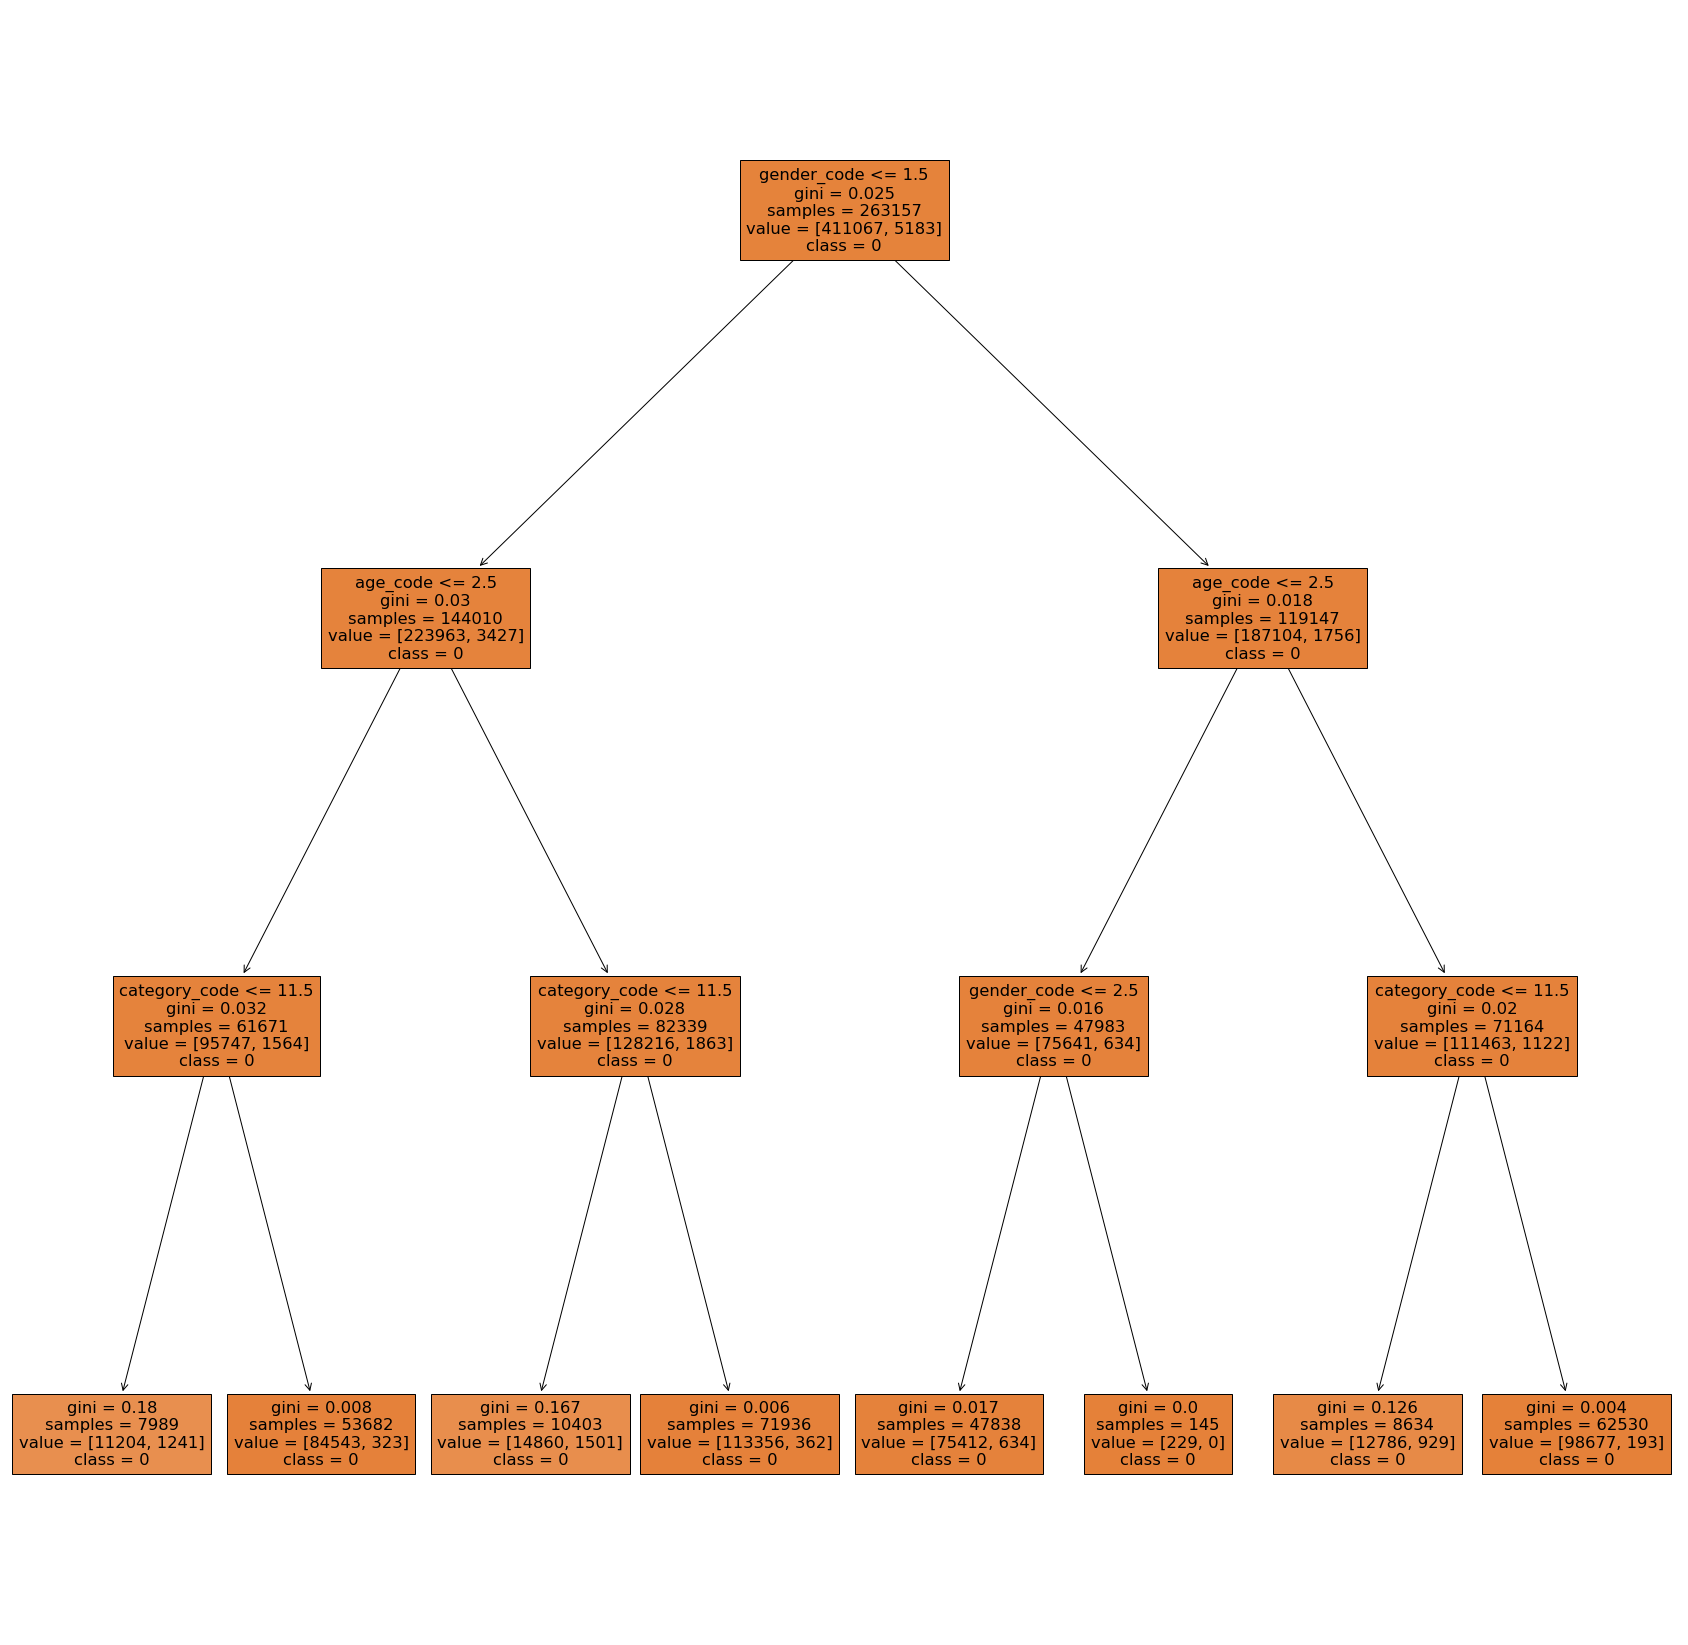

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

RFC = RandomForestClassifier(random_state=1, max_depth = 3).fit(X_train, y_train)  

plt.figure(figsize=(30,30))
tree.plot_tree(RFC.estimators_[0],
                 feature_names=["age_code", "gender_code", "category_code", "amount"],
                 class_names=["0", "1"],
                 filled = True)